# Introduction

The set of experiments below explore different control functions using PID algorithm. This an [incremental approach](https://www.sciencedirect.com/topics/computer-science/incremental-development) to the development of the control system. [cite]



## Exp 1 | Simple 1D Rocket Control

In this experiment I am using PID to control a simple model of a rocket in one vertical dimension. The rocket is trying to maintain a constant height, however it is being accelerated downward constantly at a rate of $ 9.81ms^{-2} $. Its new velocity after a descrete time period, dt is being calculated via the equation :

$ v_{n+1} = v_n dt + (\frac 1 2 a)dt^2 $ 

-4.905 | Thrust =  0.0
-2.4525000000000006 | Thrust =  14.715
-3.6787499999999995 | Thrust =  7.357500000000003
-0.6131250000000006 | Thrust =  15.941249999999998
-0.9196874999999998 | Thrust =  9.196875000000002
1.0729687500000007 | Thrust =  13.795312500000001
0.3832031250000001 | Thrust =  8.43046875
1.1879296875 | Thrust =  11.419453125
0.2490820312499995 | Thrust =  7.932304687499999
0.5269042968750002 | Thrust =  10.365644531250002
-0.20597167968750085 | Thrust =  8.344248046874998
0.03592529296874947 | Thrust =  10.293793945312501
-0.348475341796874 | Thrust =  9.041198730468754
-0.053289184570313175 | Thrust =  10.400372314453122
-0.21884490966796655 | Thrust =  9.478888549804694
0.0381706237792967 | Thrust =  10.324031066894527
-0.06369255065917834 | Thrust =  9.60627365112305
0.09666149139404201 | Thrust =  10.130708084106441
-0.0026008415222165127 | Thrust =  9.611475334167483
0.07887660026550147 | Thrust =  9.972954883575436
-0.010192866325379413 | Thrust =  9.6318610668182

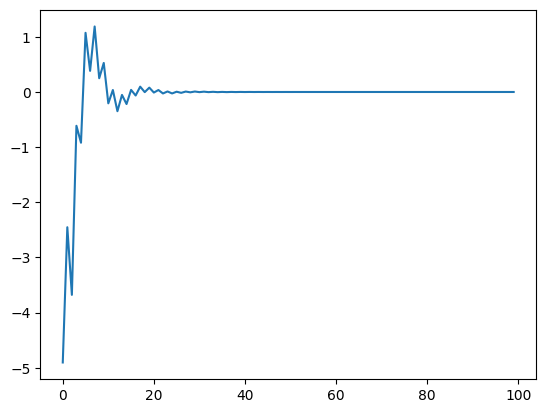

In [6]:
import sys
import os
import time
from experiments.oneDRocket.rocketModel import Rocket
from experiments.pidModule import PidController
#from experiments.plotter import Visual
import matplotlib.pyplot as plt

sim = Rocket()
#visual = Visual()

# --- GAINS ---
KP = 1
KI = 1
KD = 1

target = 0
dt = 1
posPoints = []
controller = PidController(KP, KI, KD)

def addXVal(pos):
    posPoints.append(pos)

def plot(posPoints):
    plt.plot(posPoints)
    plt.show()

def Main():

    x = 0
    pos = sim.getPos()

    while(x < 100):
        power = controller.pid(pos, target, dt)
        sim.update(power, dt)
        pos = sim.getPos()
        addXVal(pos)
        #visual.visual(pos)
        print(pos,"| Thrust = ", power)
        x = x +1
        #print(x)

        time.sleep(0.01)
    plot(posPoints)

Main()

## Exp 2 | Simple Boat Model

In this experiment I am using PID to control a simple model of a boat turning in response to the angle of the rudder.

Set out below is the mathmatics behind this simple boat model

(maths)

In [ ]:
import boatv1model
import pid
import tester

set constants: p,i,d
set constant: target heading
using tester with boatv1 model and pid
plot the boat heading over time

## Exp 3 | Advanced Boat Model

In this experiment I am using PID to control a advanced model of a boat turning in response to the angle of the rudder, where the boat turn in response to the rudder angle has a time lag.

Set out below is the mathmatics behind this advanced boat model, where the change in the turn is described by a differential equation.

(maths)

![image](./experiments/oneDRocket/boatCourse.excalidraw.png)

In [ ]:
import boatv2model
import pid
import tester

set constants: p,i,d
set constant: target heading
using tester with boatv2 model and pid
plot the boat heading over time